In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [41]:
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


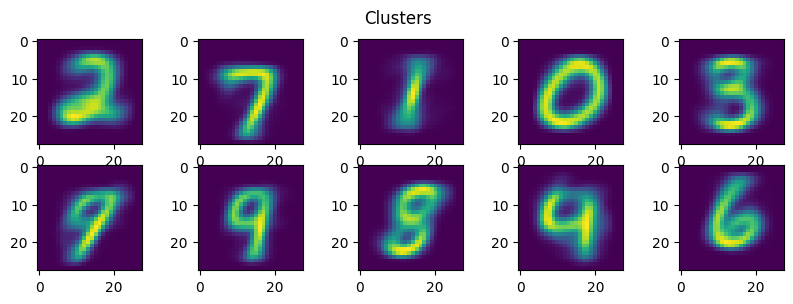

In [73]:
model = KMeans(n_clusters=10)
model.fit(test_data)

fig = plt.figure(figsize=(10,3))
fig.suptitle('Clusters')

for i in range(10):
    sp = fig.add_subplot(2, 5, 1+i)
    sp.imshow(model.cluster_centers_[i].reshape((28, 28)))
plt.show()

In [75]:
test_data = pd.read_csv('test.csv')
labels = model.predict(test_data)
ids = list(range(1, len(test_data)+1))

cluster_list = [0,1,2,3,4,5,6,7,8,9]
number_list = [2,7,1,0,3,5,9,8,4,6]

cluster_dict = dict(zip(cluster_list, number_list))

mapped_guesses = []
for guess in labels:
    mapped_guesses.append(cluster_dict[guess])

df = pd.DataFrame({'ImageId': ids, 'Label': mapped_guesses})

df.to_csv('output.csv')

In [76]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,5
3,4,5
4,5,2
